# <center>+++ Project is currently in progress ;-) +++<center>

# Generative Model classification for handwritten digits

In this notebook I will build a **generative model classifier** to classify the handwritten digits from the MNIST dataset. The results will be compared with the k-Nearest-Neighbor classifier for the MNIST dataset from my other project. 

# 1. Set up the notebook and load the data

Just like I did with the k-Nearest-Neighbour classifier for the MNIST dataset, I'll be working with a subset of the data. The complete dataset consists of 60,000 and 10,000 training and test images respectively. The subset contains 7,500 training images and 1,000 test images.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

In [2]:
# Load the training set
train_data = np.load('MNIST/train_data.npy')
train_labels = np.load('MNIST/train_labels.npy')

# Load the testing set
test_data = np.load('MNIST/test_data.npy')
test_labels = np.load('MNIST/test_labels.npy')

In [7]:
# Print out the dimensions of the datasets
print('Training data set dimensions: {}'.format(np.shape(train_data)))
print('Number of training data labels: {}'.format(len(train_labels)))
print('Test data set dimensions: {}'.format(np.shape(test_data)))
print('Number of test data labels: {}'.format(len(test_labels)))

Training data set dimensions: (7500, 784)
Number of training data labels: 7500
Test data set dimensions: (1000, 784)
Number of test data labels: 1000


Let's see whether within the training and test images each number is equally represented.

In [20]:
train_digits, train_counts = np.unique(train_labels, return_counts=True)
dict_train_distribution = dict(zip(train_digits, train_counts))
print('train digit \tcounts')
[print('{} \t\t{}'.format(i, dict_train_distribution.get(i))) for i in list(train_digits)]

test_digits, test_counts = np.unique(test_labels, return_counts=True)
dict_test_distribution = dict(zip(test_digits, test_counts))
print('\ntest digit \tcounts')
[print('{} \t\t{}'.format(i, dict_test_distribution.get(i))) for i in list(test_digits)];

train digit 	counts
0 		750
1 		750
2 		750
3 		750
4 		750
5 		750
6 		750
7 		750
8 		750
9 		750

test digit 	counts
0 		100
1 		100
2 		100
3 		100
4 		100
5 		100
6 		100
7 		100
8 		100
9 		100


# 2. Visualizing the data

Each data point is stored as a 784-dimensional vector. To visualize a data point, let's first reshape it to a 28x28 image.

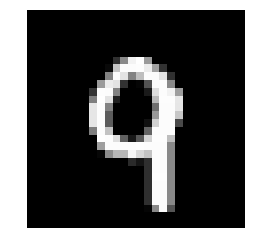

Label 9


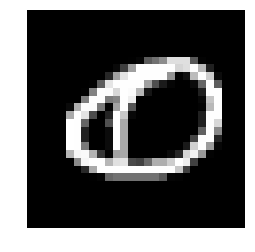

Label 0


In [21]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

## View the first data point in the training set
vis_image(0, "train")

## Now view the first data point in the test set
vis_image(0, "test")

# 3. Fit a Gaussian generative model to the training data

* pi[j] 10x1
* mu[j] 10x784
* sigma[j] 10x784x784

In [42]:
def fit_generative_model(x, y, c):
    k = 3
    d = (x.shape)[1]
    pi = np.zeros(k)
    mu = np.zeros((k, d))
    sigma = np.zeros((k,d,d))
    
    for label in range(k):
        indices = (y == label)
        pi[label] = float(sum(indices)/len(y))
        mu[label] = np.mean(x[indices], axis=0)
    print('pi', pi)
    print('mu', mu)
    print('sigma', sigma)
    return pi, mu, sigma

In [44]:
x = np.array([[1, 2, 3],[3, 4, 5],[2, 4, 6],[7, 8, 9]])
y = np.array([0, 0, 1, 2])
c = 1
fit_generative_model(x, y, c);
#print(pi, mu, sigma)

(2, 3)
(1, 3)
(1, 3)
pi [0.5  0.25 0.25]
mu [[2. 3. 4.]
 [2. 4. 6.]
 [7. 8. 9.]]
sigma [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [39]:
np.shape(y)

(4,)